**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Imports and set magics:

In [24]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [25]:
# write your code here

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [26]:
# write your code here


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [27]:
# write your code here

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [28]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [29]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [30]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [31]:
import time
from types import SimpleNamespace

# namespaces
par = SimpleNamespace()
sim = SimpleNamespace()
sol = SimpleNamespace()
opt = SimpleNamespace()

from sim import simClass
model = simClass()
par = model.par # SimpeNamespace
sim = model.sim # SimpeNamespace


initializing the model:
calling .setup()
calling .allocate()


In [32]:
# a. profits
profits = lambda l: par.kappa*l**(1-par.eta) - par.w*l
v = lambda x: -profits(x) # value function do to minimizer

# b. numerical solution
sol = optimize.minimize(v, [0.5], method='Nelder-Mead')
opt.l = sol.x[0]
print(f'the numerical solution for labor is {opt.l:.3f}')

# c. tests whether analytical and numerical solution are close
l_sol = (((1-par.eta)*par.kappa)/par.w)**(1/par.eta)
isclose = np.isclose(opt.l,l_sol)
print(f'the numerical solution is the same as the analytical solution: {isclose}')

the numerical solution for labor is 0.563
the numerical solution is the same as the analytical solution: True


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

Simulating the model one time

In [33]:
# simulating
sol1 = model.simulate(delta=0.1)


Plotting the evolution of the demand shock and optimal labor

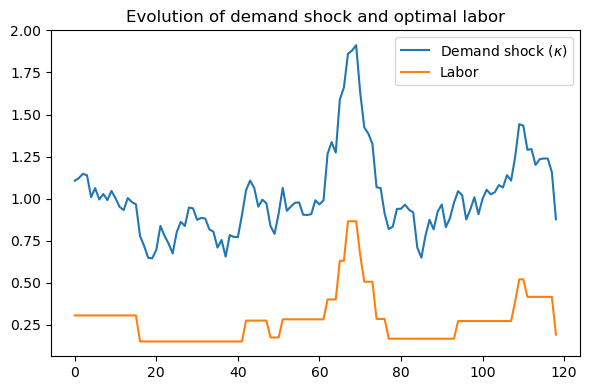

In [34]:
# a. plotting figure
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)

# b. adding plots
ax.plot(sim.kappa,label='Demand shock $(\kappa)$') # kappa 
ax.plot(sim.l,label='Labor') # labor

# c. specifications
ax.legend(frameon=True)
ax.set_title('Evolution of demand shock and optimal labor')
fig.tight_layout()


Finding the average $H$, when simulating the model multiple times 

In [35]:
# simulate 1000 times
sol = model.simulate(K=1000)
sol2_H = sim.H # storing result

print(f'the average H is {sim.H:.2f} using {sim.K} simulations')

the average H is 27.53 using 1000 simulations


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

Finding the average $H$, when simulating 100 times ande $\Delta$ is 0.05 

In [36]:
# a. simulating 100 times where delta is 0.05
sol3 = model.simulate(K=100, delta=0.05)

print(f'the average H is {sim.H:.2f} using {sim.K} simulation(s) where delta is {sim.delta}' )

# b. is the policy better
if sol3.H > sol2_H:
    print(f'as {sol3.H:.2f} > {sol2_H:.2f}, we see that the policy improves profitability')
else:
    print(f'as {sol3.H:.2f} < {sol2_H:.2f}, we see that the policy does not improves profitability')

the average H is 27.76 using 100 simulation(s) where delta is 0.05
as 27.76 > 27.53, we see that the policy improves profitability


**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

Calculating optimal values using simple approach

In [37]:
# a. value function to optimize
vH = lambda x: -(model.simulate(K=100,delta=x).H)

# b. optimal value
opt_delta = optimize.minimize(vH, [0.01], method='SLSQP',bounds=[(0,0.2)]).x[0]

print(f'the optimal delta is {opt_delta:.3f}')

the optimal delta is 0.010


The issue with the above approach is, that it is unable to properly capture the optimal value, as the function is very spikey. This results in the optimal value being very close to the initial guess. One solution is to try many initial guesses.

We try this below. You can add more initial guesses if to increase accuracy at the cost of speed.

In [38]:
# optimial delta with 10 differetn initial guesses
sol = model.optimizer(vH,n_guess=10,K=100,do_print=False)

best, best_delta, best_H = sol[0], sol[1], sol[2]

print(f'optimal delta={best_delta:.3f} with H={best_H:.3f}')

optimal delta=0.100 with H=28.668


Unfortunately the optimal $\Delta$ is largely dependent on the drawn seed due to the stochastick process of the demand shock. 

One way to deal with this, is to find the average optimal value of $\Delta$ when simulating the model with multiple seeds. We attempt this below woth 10 randomly drawn seeds. 

In [39]:
# a. seeds
seeds = 10

# b. setup
opt = np.zeros((2,seeds))

# c. optimal delta with different seeds and 5 guesses
for x in range(seeds):

    sol = model.optimizer(vH,n_guess=5,K=100)

    opt[0,x] = sol[1] # optimal delta
    opt[1,x] = sol[2] # optimal H
    
    # print(sol[1])

# d. average optimal
avg_delta = np.average(opt[0])
avg_H = np.average(opt[1])

print(f'average optimal delta={avg_delta:.3f} with H={avg_H:.3f}')        

KeyboardInterrupt: 

We can now illustrate the average optimal value of $\Delta$, using a random draw of $H$ for given values of $\Delta$ as backdrop. 

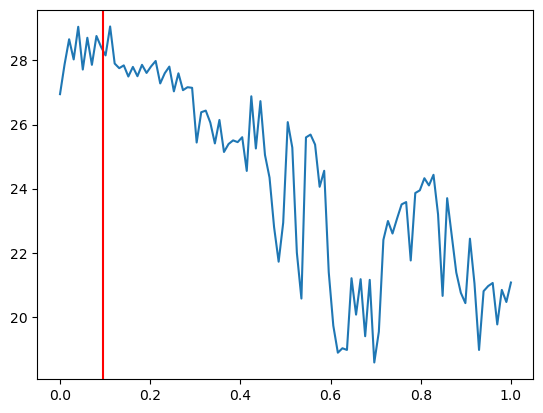

In [ ]:
# a. setup
ticks = 100
delta_values = np.linspace(0,1,ticks)
H_values = np.zeros((1,ticks))
i = 0

# b. simulating
for x in delta_values:
    H_values[0,i] = model.simulate(K=100, delta=x).H
    i += 1

# c. plot 
plt.plot(delta_values,H_values[0])

# d. inserts line with optimal delta
plt.axvline(x=avg_delta,color='red')


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [ ]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [40]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [41]:
# 1. choose bounds x and tolerance tau > 0
x1 = -600
x2 = 600
tau = 10**(-8)

# 2. choose number of warm-up iterations K_ > 0 and maximum number of iterations K > K_
K_ = 10
K = 1000

# misc. setup
xk = np.zeros((2))
x_star = [1000,1000]
xk0=[xk[0],xk[1]] 


**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [43]:
# 3. 
for k in range(K):
   # A. Draw
   xk[0] = np.random.uniform(x1,x2)
   xk[1] = np.random.uniform(x1,x2)

   if k==0:
      xk0=[xk[0],xk[1]]
   
   # B. k>=K_
   if k >= K_:
         
      # C. calculate xk
      chik = 0.5*2/(1+np.exp((k-K_)/100))

      # D. set xk0
      xk0 = chik*xk + (1-chik)*x_star

   # E. run optimizer
   xk_star = optimize.minimize(griewank,xk0,method='BFGS',tol=tau).x
   
   # F. set x_star = xkstar
   if k==0:
      x_star=xk_star
   elif griewank(xk_star) < griewank(x_star):
      x_star=xk_star
      print(f'change: {x_star}')

   # # G. go to step 4         
   if griewank(x_star) < tau:
      break

# 4. return x_star
print(f'the optimal values for x is: {x_star[0]:.3f} and {x_star[1]:.3f}')


change: [-339.12103003 -115.39771685]
change: [-248.0595335  -244.11123212]
change: [-116.18065243 -102.08396073]
change: [-147.5809938    13.31529693]
change: [-122.46077643   66.57651736]
change: [ 25.12013204 124.27627558]
change: [ 15.70010196 -75.45351824]
change: [-6.28004226 62.13820259]
change: [40.82029202 13.31533051]
change: [-28.26020158 -22.19221934]
change: [-9.42006733 22.19222132]
change: [21.98015821 -4.43844423]
change: [-9.42006789 -4.43844444]
change: [-6.28004528e+00 -5.88024577e-09]
change: [-3.14002264 -4.43844448]
change: [ 3.14002263 -4.43844449]
change: [3.14002264 4.43844448]
change: [ 1.86092115e-10 -1.00410041e-08]
the optimal values for x is: 0.000 and -0.000
